## Minhash distances  
Minhash version of Jaccard Distance to try to get distaces among whole data set (one gene at a time)

In [1]:
# imports
from Bio.SeqIO.FastaIO import SimpleFastaParser
import pandas as pd
import numpy as np
import itertools as it
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 150
from datasketch import MinHash

In [2]:
with open('influenza.fna') as fasta_file: 
    cgi_titles = []
    cgi_sequences = []
    for title, sequence in SimpleFastaParser(fasta_file):
        cgi_titles.append(title)
        cgi_sequences.append(sequence)
influenza_na = pd.DataFrame(list(zip(cgi_titles, cgi_sequences)), columns=['titles','sequences'])
uniflna = influenza_na.drop_duplicates('sequences')


In [31]:
uniflna_HA = uniflna.loc[uniflna.iloc[:,0].str.contains(r'\(HA\) | hemagglutinin | (segment 4)')]

/home/brian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.


In [32]:
uniflna_HA.shape

(102414, 2)

In [25]:
uniflna_NA = uniflna.loc[uniflna.iloc[:,0].str.contains(r'\(NA\) | neuraminidase | (segment 6)')]

/home/brian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.


In [33]:
uniflna_NA.shape

(66339, 2)

In [34]:
uniflna_HA.head()

,titles,sequences
45,gi|60774|gb|X00027|Influenza A virus (A/USSR/9...,ATGAAAGCAAAACTACTGGTCCTGTTATGTGCACTTTCAGCTACAG...
46,gi|60775|gb|X00028|Influenza A virus (A/Brazil...,ATGAAAGCAAAACTACTGGTCCTGTTATGTGCACTTTCAGCTACAG...
50,gi|60779|gb|X00897|Influenza B virus (B/Singap...,AGCAGAAGCAGAGCATTTTCTAATATCCACAAAATGAAGGCAATAA...
60,gi|60806|gb|V01105|Influenza A virus (A/chicke...,AGCAAAAGCAGGGGTTACAAAATGAACACTCAAATCCTGGTTTTCG...
69,gi|62290|gb|V01088|Influenza A virus (A/PR/8/3...,AGCAAAAGCAGGGGAAAATAAAAACAACCAAAATGAAGGCAAACCT...


In [38]:
uniflna_NA_sub1 = uniflna_NA.sample(10)

In [41]:
uniflna_NA_sub1

,titles,sequences
278811,gi|525553048|gb|KF314378|Influenza B virus (B/...,AAAGGAAACTCAGCTCCCTTGATAATAAGGGAACCTTTTATTGCTT...
270763,gi|505555171|gb|KC986810|Influenza B virus (B/...,ATGCTACCTTCAACTATACAAACGTTAACCCTATTTCTCACATCAG...
272858,gi|511106139|gb|KF130906|Influenza A virus (A/...,ATGAATCCAAATCAAAAGATAATAACAATTGGCTCTGTTTCTCTCA...
12351,gi|56122827|gb|AY786079|Influenza A virus (A/T...,TGTTACAAATTGGGAACTTGATCTCAATATGGGTCAGTCATTCAAT...
526888,gi|1168685076|gb|CY223439|Influenza A virus (A...,AGTTTAAAATGAATCCAAACCAAAAGATAATAACCATTGGTTCGAT...
277613,gi|525329540|gb|KF305960|Influenza A virus (A/...,ATAACAATTGGCTCTGTTTCTCTCACTATTGCCACACTATGCCTCC...
239282,gi|444330612|gb|CY133334|Influenza A virus (A/...,AGTGAAAATGAATCCAAATCAGAAGATAATAACAATTGGTTCCGTC...
35653,gi|115521830|gb|CY016605|Influenza A virus (A/...,AAAGATGAATCCAAATCAAAAGATAATAACGATTGGCTCTGTTTCT...
270021,gi|498921498|gb|CY146418|Influenza A virus (A/...,GTGATTGAGAATGAATCCTAATCAAAAATTATTCGCACTCTCTGGG...
349784,gi|676287121|gb|KM409332|Influenza A virus (A/...,ATGAATCCAAACCAAAAGATAATAACCATTGGTTCGGTCTGTATGA...


In [43]:
idl=list(it.combinations(list(uniflna_NA_sub1.index),2))
idl

[(278811, 270763),
 (278811, 272858),
 (278811, 12351),
 (278811, 526888),
 (278811, 277613),
 (278811, 239282),
 (278811, 35653),
 (278811, 270021),
 (278811, 349784),
 (270763, 272858),
 (270763, 12351),
 (270763, 526888),
 (270763, 277613),
 (270763, 239282),
 (270763, 35653),
 (270763, 270021),
 (270763, 349784),
 (272858, 12351),
 (272858, 526888),
 (272858, 277613),
 (272858, 239282),
 (272858, 35653),
 (272858, 270021),
 (272858, 349784),
 (12351, 526888),
 (12351, 277613),
 (12351, 239282),
 (12351, 35653),
 (12351, 270021),
 (12351, 349784),
 (526888, 277613),
 (526888, 239282),
 (526888, 35653),
 (526888, 270021),
 (526888, 349784),
 (277613, 239282),
 (277613, 35653),
 (277613, 270021),
 (277613, 349784),
 (239282, 35653),
 (239282, 270021),
 (239282, 349784),
 (35653, 270021),
 (35653, 349784),
 (270021, 349784)]

In [47]:
# character kgram function
def charkgram(text, k):
    results=[]
    for i in range(len(text)-k+1):
        if text[i:i+k] not in results:
            results.append(text[i:i+k])
    return(results)

#### short test with 10 seqs and JD for real

In [54]:
for i in idl:
    #print(uniflna_NA_sub1.loc[[i[0]]].sequences.values[0])
    data1 = charkgram(uniflna_NA_sub1.loc[[i[0]]].sequences.values[0],5)
    data2 = charkgram(uniflna_NA_sub1.loc[[i[1]]].sequences.values[0],5)
    m1, m2 = MinHash(), MinHash()
    for d in data1:
        m1.update(d.encode('utf8'))
    for d in data2:
        m2.update(d.encode('utf8'))
    destimate=1-m1.jaccard(m2)
    print("Estimated Jaccard for data1 and data2 is", destimate)
    s1 = set(data1)
    s2 = set(data2)
    actual_jaccardd = 1-(float(len(s1.intersection(s2)))/float(len(s1.union(s2))))
    print("Actual Jaccard for data1 and data2 is", actual_jaccardd)



Estimated Jaccard for data1 and data2 is 0.2109375
Actual Jaccard for data1 and data2 is 0.21311475409836067
Estimated Jaccard for data1 and data2 is 0.3671875
Actual Jaccard for data1 and data2 is 0.45671267252195735
Estimated Jaccard for data1 and data2 is 0.4453125
Actual Jaccard for data1 and data2 is 0.5310734463276836
Estimated Jaccard for data1 and data2 is 0.4140625
Actual Jaccard for data1 and data2 is 0.4900990099009901
Estimated Jaccard for data1 and data2 is 0.3671875
Actual Jaccard for data1 and data2 is 0.46113989637305697
Estimated Jaccard for data1 and data2 is 0.390625
Actual Jaccard for data1 and data2 is 0.4627994955863808
Estimated Jaccard for data1 and data2 is 0.375
Actual Jaccard for data1 and data2 is 0.4469987228607918
Estimated Jaccard for data1 and data2 is 0.4765625
Actual Jaccard for data1 and data2 is 0.5043156596794081
Estimated Jaccard for data1 and data2 is 0.4140625
Actual Jaccard for data1 and data2 is 0.4931506849315068
Estimated Jaccard for data1 an

In [55]:
uniflna_NA_sub2 = uniflna_NA.sample(500)
idl2=list(it.combinations(list(uniflna_NA_sub2.index),2))

In [56]:
len(idl2)

124750

In [57]:
results=[]
for i in idl2:
    #print(uniflna_NA_sub1.loc[[i[0]]].sequences.values[0])
    data1 = charkgram(uniflna_NA_sub2.loc[[i[0]]].sequences.values[0],5)
    data2 = charkgram(uniflna_NA_sub2.loc[[i[1]]].sequences.values[0],5)
    m1, m2 = MinHash(), MinHash()
    for d in data1:
        m1.update(d.encode('utf8'))
    for d in data2:
        m2.update(d.encode('utf8'))
    destimate=1-m1.jaccard(m2)
    results.append(destimate)
    #print("Estimated Jaccard for data1 and data2 is", estimate)



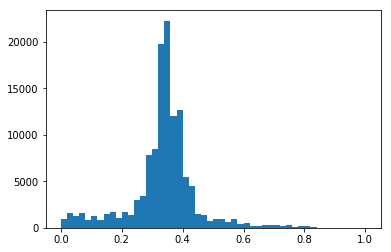

In [58]:
plt.hist(results, 50, range=(0,1));

In [59]:
uniflna_HA_sub1 = uniflna_HA.sample(200)
idl3=list(it.combinations(list(uniflna_HA_sub1.index),2))

In [65]:
results2=[]
for i in idl3:
    data1 = charkgram(uniflna_HA_sub1.loc[[i[0]]].sequences.values[0],5)
    data2 = charkgram(uniflna_HA_sub1.loc[[i[1]]].sequences.values[0],5)
    m1, m2 = MinHash(num_perm=64), MinHash(num_perm=64)
    for d in data1:
        m1.update(d.encode('utf8'))
    for d in data2:
        m2.update(d.encode('utf8'))
    destimate=1-m1.jaccard(m2)
    results2.append(destimate)

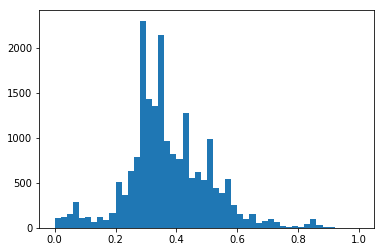

In [66]:
plt.hist(results2, 50, range=(0,1));

In [62]:
uniflna_HA_sub2 = uniflna_HA.sample(200)
idl4=list(it.combinations(list(uniflna_HA_sub2.index),2))

In [67]:
results3=[]
for i in idl4:
    data1 = charkgram(uniflna_HA_sub2.loc[[i[0]]].sequences.values[0],5)
    data2 = charkgram(uniflna_HA_sub2.loc[[i[1]]].sequences.values[0],5)
    m1, m2 = MinHash(num_perm=64), MinHash(num_perm=64)
    for d in data1:
        m1.update(d.encode('utf8'))
    for d in data2:
        m2.update(d.encode('utf8'))
    destimate=1-m1.jaccard(m2)
    results3.append(destimate)

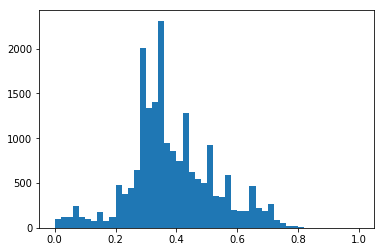

In [69]:
plt.hist(results3, 50, range=(0,1));